# **Social dimensions of work value and subjective health of working people: Evidence from ISSP surveys in six Asian countries**


In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("issp_log.csv", sep = ",")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   code           5223 non-null   object 
 1   country        5223 non-null   object 
 2   j_satis        5223 non-null   object 
 3   age            5223 non-null   object 
 4   wrk_hrs        5223 non-null   object 
 5   MARITAL        5223 non-null   object 
 6   wv_1           5223 non-null   object 
 7   wv_2           5223 non-null   object 
 8   wv_3           5223 non-null   object 
 9   wv_4           5223 non-null   object 
 10  wv_5           5223 non-null   object 
 11  wv_6           5223 non-null   object 
 12  wv_7           5223 non-null   object 
 13  wv_8           5223 non-null   object 
 14  wv_9           5223 non-null   object 
 15  health_status  5223 non-null   object 
 16  gender         5223 non-null   object 
 17  work_or_not    5223 non-null   object 
 18  job_ch_1

In [4]:
#assigning selected working variables
selected = ["country", "gender", "age_imp", 
                        "value_mean", "health_binary"]

issp_logit = df[selected]
print(issp_logit.head())

  country  gender  age_imp  value_mean health_binary
0   China    Male     31.0    3.444444      Not Good
1   China  Female     34.0    3.666667          Good
2   China  Female     45.0    5.000000          Good
3   China  Female     38.0    4.666667          Good
4   China  Female     59.0    4.444444          Good


In [7]:
issp_logit["health_binary"].value_counts()

Good        3506
Not Good    1697
              20
Name: health_binary, dtype: int64

In [5]:
#Replacing NaN into missing ("") cells
issp_logit.replace(" ", np.nan, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
#To see how many NaN cells are there
issp_logit.isnull().sum()

country           0
gender            0
age_imp           0
value_mean        0
health_binary    20
dtype: int64

In [6]:
#To see the condition of response variable which is in binary form
issp_logit["health_binary"]

0       Not Good
1           Good
2           Good
3           Good
4           Good
          ...   
5218        Good
5219    Not Good
5220        Good
5221    Not Good
5222        Good
Name: health_binary, Length: 5223, dtype: object

In [9]:
#To convert response object variable type to category type response variable
issp_logit["health_binary"] = issp_logit["health_binary"].astype('category')

<ipython-input-9-f4d6677296c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issp_logit["health_binary"] = issp_logit["health_binary"].astype('category')


In [10]:
issp_logit["health_binary"]

0       Not Good
1           Good
2           Good
3           Good
4           Good
          ...   
5218        Good
5219    Not Good
5220        Good
5221    Not Good
5222        Good
Name: health_binary, Length: 5223, dtype: category
Categories (2, object): [Good, Not Good]

In [11]:
issp_logit["health_binary"].value_counts()

Good        3506
Not Good    1697
Name: health_binary, dtype: int64

In [12]:
issp_logit["health_binary"]

0       Not Good
1           Good
2           Good
3           Good
4           Good
          ...   
5218        Good
5219    Not Good
5220        Good
5221    Not Good
5222        Good
Name: health_binary, Length: 5223, dtype: category
Categories (2, object): [Good, Not Good]

In [15]:
issp_logit.replace(" ", np.nan, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [16]:
issp_logit["health_binary"].value_counts()

Good        3506
Not Good    1697
Name: health_binary, dtype: int64

In [13]:
print(issp_logit.tail(50))

     country  gender  age_imp  value_mean health_binary
5173  Taiwan  Female     40.0    4.666667          Good
5174  Taiwan  Female     31.0    3.777778      Not Good
5175  Taiwan  Female     22.0    3.777778          Good
5176  Taiwan  Female     38.0    3.666667          Good
5177  Taiwan  Female     25.0    3.888889      Not Good
5178  Taiwan    Male     23.0    3.222222          Good
5179  Taiwan  Female     33.0    3.555556      Not Good
5180  Taiwan  Female     49.0    3.444444      Not Good
5181  Taiwan    Male     29.0    3.777778          Good
5182  Taiwan    Male     54.0    3.888889      Not Good
5183  Taiwan  Female     35.0    4.000000          Good
5184  Taiwan    Male     67.0    4.000000      Not Good
5185  Taiwan  Female     20.0    3.777778          Good
5186  Taiwan  Female     32.0    4.666667          Good
5187  Taiwan    Male     48.0    3.666667          Good
5188  Taiwan    Male     64.0    4.222222      Not Good
5189  Taiwan    Male     39.0    4.222222       

In [ ]:
####Best option to find which cells have NaN values. I used this function to find missing cells

In [14]:
issp_logit.loc[issp_logit.isnull().any(axis=1)]

,country,gender,age_imp,value_mean,health_binary
848,Israel,Female,42.000000,3.888889,NaN
1084,Israel,Male,43.292178,3.000000,NaN
1472,Israel,Male,40.000000,5.000000,NaN
1478,Israel,Male,65.000000,4.666667,NaN
1664,India,Male,54.000000,4.000000,NaN
1731,India,Female,62.000000,4.000000,NaN
1732,India,Female,37.000000,4.222222,NaN
1790,India,Male,27.000000,3.978426,NaN
1971,India,Female,39.000000,3.555556,NaN
2080,India,Male,27.000000,3.444444,NaN


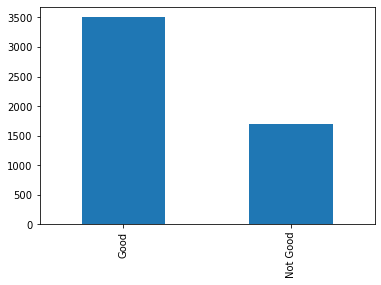

In [15]:
#Bar plot before fixing NaN cells
issp_logit["health_binary"].value_counts().plot.bar()

In [16]:
##Now, we will impute NaN values with "Good", because Good has maximum cells (mood)
issp_logit["health_binary"].fillna("Good", inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
#To check if there is anymore missing cells (NaN)
issp_logit['health_binary'].isnull().sum()

0

In [ ]:
##Now, we see in the above cell that we do not have any missing value (NaN) in health_binary

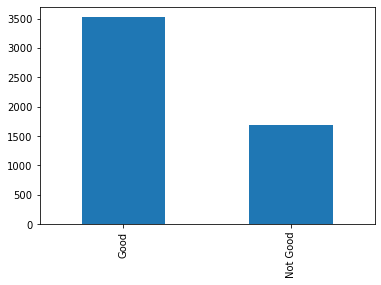

In [20]:
issp_logit["health_binary"].value_counts().plot.bar()

**To create dummies for health_binary variable. This creates two separate variables**

 

In [21]:
issp_logit = pd.get_dummies(issp_logit, columns=['health_binary'])

In [22]:
#Two new variables from health_binary: health_binary_Good, health_binary_Not Good
issp_logit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 5223 non-null   object 
 1   gender                  5223 non-null   object 
 2   age_imp                 5223 non-null   float64
 3   value_mean              5223 non-null   float64
 4   health_binary_Good      5223 non-null   uint8  
 5   health_binary_Not Good  5223 non-null   uint8  
dtypes: float64(2), object(2), uint8(2)
memory usage: 173.5+ KB


In [23]:
issp_logit["health_binary_Good"].value_counts()

1    3526
0    1697
Name: health_binary_Good, dtype: int64

In [26]:
#First model (on all six countries) on work value and health_binary_Good
mdl_1 = logit('health_binary_Good~value_mean', data=issp_logit).fit()
print(mdl_1.params)

Optimization terminated successfully.
         Current function value: 0.621472
         Iterations 5
Intercept    -1.53974
value_mean    0.57441
dtype: float64


In [25]:
print(mdl_1.summary())

                           Logit Regression Results                           
Dep. Variable:     health_binary_Good   No. Observations:                 5223
Model:                          Logit   Df Residuals:                     5221
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Feb 2021   Pseudo R-squ.:                 0.01434
Time:                        01:55:04   Log-Likelihood:                -3246.0
converged:                       True   LL-Null:                       -3293.2
Covariance Type:            nonrobust   LLR p-value:                 2.508e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5397      0.237     -6.496      0.000      -2.004      -1.075
value_mean     0.5744      0.060      9.601      0.000       0.457       0.692


In [27]:
#Importing statsmodels library as sm
import statsmodels.api as sm


In [28]:
#To write mdl_1 summary table in text format
with open('summary.txt', 'w') as fh:
    fh.write(mdl_1.summary().as_text())

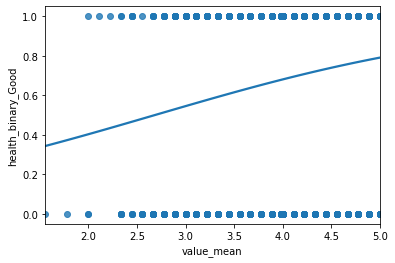

In [29]:
#To show regplot (without predicted values)
sns.regplot(x="value_mean", y="health_binary_Good", data=issp_logit, ci=None, logistic=True)
plt.show()

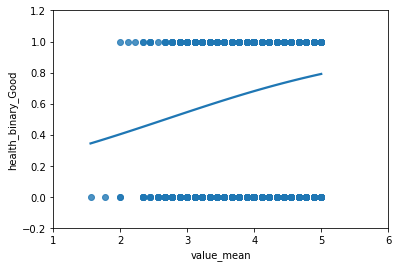

In [58]:
sns.regplot(x="value_mean", y="health_binary_Good", data=issp_logit, ci=None, logistic=True)
plt.xlim(1, 6)
plt.ylim(-0.2, 1.2)
plt.show()

**Logistic Regression Prediction to the plot**

In [32]:
#Arranging explanatory variable (value_mean) in 0.25 intervals in a dataframe
explanatory_data = pd.DataFrame({"value_mean": np.arange(1,5.25,.25)})

In [33]:
print(explanatory_data)

    value_mean
0         1.00
1         1.25
2         1.50
3         1.75
4         2.00
5         2.25
6         2.50
7         2.75
8         3.00
9         3.25
10        3.50
11        3.75
12        4.00
13        4.25
14        4.50
15        4.75
16        5.00


In [36]:
##Predicting inside a dataframe using assign function (for health_binary_Good variable)
prediction_data=explanatory_data.assign(health_binary_Good=mdl_1.predict(explanatory_data))

In [37]:
print(prediction_data)

    value_mean  health_binary_Good
0         1.00            0.275812
1         1.25            0.305397
2         1.50            0.336680
3         1.75            0.369463
4         2.00            0.403496
5         2.25            0.438484
6         2.50            0.474094
7         2.75            0.509970
8         3.00            0.545744
9         3.25            0.581051
10        3.50            0.615548
11        3.75            0.648920
12        4.00            0.680897
13        4.25            0.711258
14        4.50            0.739833
15        4.75            0.766509
16        5.00            0.791222


In [38]:
#Assigning the prediction table to an object pred_1
pred_1 = pd.DataFrame(prediction_data)

In [39]:
#To write prediction table in csv format
pred_1.to_csv('pred_1.csv')

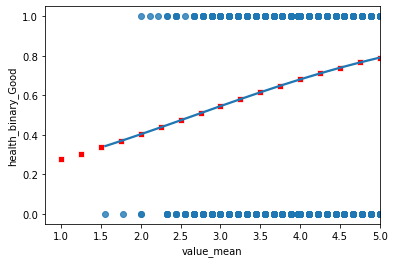

In [41]:
##Adding point predictions (red dots) on the regplot (blue line)
sns.regplot(x = "value_mean", y = "health_binary_Good", data = issp_logit, ci = None, logistic=True )
sns.scatterplot(x = "value_mean", y = "health_binary_Good", data = prediction_data, color = "red", marker='s')

plt.show()

# ***# Work value and health for CHINA***